Importing Neccessary Libraries

In [1]:
import re
import os
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from collections import OrderedDict
from itertools import product
from parse_football_stats import parse_football_stats
from top_n_outcomes_from_folder import top_n_outcomes_from_folder

C:\Users\adamf\AppData\Local\Temp\ipykernel_2380\1573113321.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Testing the parsing function
Parameters:
filename (`str`): The path to the `HTML file` containing football match statistics.

Returns:
`pandas.DataFrame`: A DataFrame containing parsed football match statistics, including team names, scores, odds, probabilities, and sorted by probabilities in descending order.

In [2]:
stats = parse_football_stats('Matches 120224-1/burnley_arsenal.html')
stats

,Game,Team,Score,Odds,Probability
0,Burnley vs Arsenal,Arsenal,2-0,13/2,0.153846
1,Burnley vs Arsenal,Arsenal,1-0,15/2,0.133333
2,Burnley vs Arsenal,Arsenal,3-0,17/2,0.117647
3,Burnley vs Arsenal,Arsenal,2-1,17/2,0.117647
4,Burnley vs Arsenal,Draw,1-1,10/1,0.100000
5,Burnley vs Arsenal,Arsenal,3-1,11/1,0.090909
6,Burnley vs Arsenal,Draw,0-0,14/1,0.071429
7,Burnley vs Arsenal,Burnley,1-0,22/1,0.045455
8,Burnley vs Arsenal,Draw,2-2,22/1,0.045455
9,Burnley vs Arsenal,Burnley,2-1,25/1,0.040000


### Testing the Top N Outcomes function
Retrieve the `top n_outcomes` outcomes from `HTML files` in the specified directory.

Parameters:
`directory` (`str`): The path to the directory containing `HTML files` with football match statistics.
`n_outcomes` (`int`, optional): The number of top outcomes to retrieve. Defaults to 2.

Returns:
`pandas.DataFrame`: A DataFrame containing the top `n_outcomes` outcomes, including teams, scores, odds, and probabilities.

In [3]:
top_n_outcomes_from_folder('Matches 120224-1', 2)

,Game,Team,Score,Odds,Probability
0,Burnley vs Arsenal,Arsenal,2-0,13/2,0.153846
1,Burnley vs Arsenal,Arsenal,1-0,15/2,0.133333
2,Fulham vs Aston Villa,Draw,1-1,7/1,0.142857
3,Fulham vs Aston Villa,Aston Villa,2-1,9/1,0.111111
4,Man City vs Chelsea,Man City,2-0,15/2,0.133333
5,Man City vs Chelsea,Man City,2-1,17/2,0.117647
6,Newcastle vs Bournemouth,Draw,1-1,8/1,0.125000
7,Newcastle vs Bournemouth,Newcastle,2-1,17/2,0.117647
8,Nottm Forest vs West Ham,Draw,1-1,6/1,0.166667
9,Nottm Forest vs West Ham,Nottm Forest,1-0,9/1,0.111111


### Creating a GridSearch to find the optimum bets

First lets define a search grid

In [4]:
num_outcomes = 5
df = top_n_outcomes_from_folder('Matches 120224-1', num_outcomes)

temp_dict = OrderedDict()
for game in df['Game'].unique():
    game_probs = []
    for i in range(len(df)):
        if df['Game'][i] == game:
            game_probs.append(df['Probability'].iloc[i:i+num_outcomes -1].tolist())
    temp_dict[game] = game_probs

param_grid = OrderedDict()
for key, value in temp_dict.items():
    param_grid[key] = [v[0] for v in value]
    
#param_grid

Now lets use an exhaustive search to find the top performing combinations

In [5]:
n = 5 # Number of top results to show
number_of_bets_correct_to_win = 6 # Set to see probabilities for different prizes

def total_probability(probabilities_list):
    total = 1
    probabilities_list = sorted(probabilities_list, reverse=True)[:number_of_bets_correct_to_win]
    for probabilities in probabilities_list:
        total *= probabilities
    return total

top_results = [] 

for params in product(*param_grid.values()):
    current_total_probability = total_probability(params)
    if len(top_results) < n or current_total_probability > min(top_results)[0]:
        top_results.append((current_total_probability, params))
        top_results.sort(reverse=True)
        top_results = top_results[:n]

print(f"Top {n} results and parameters:")
for i, (result, params) in enumerate(top_results, start=1):
    print(f"Result {i}: Total Probability = {result}, Parameters = {params}")


Top 5 results and parameters:
Result 1: Total Probability = 7.182360123536592e-06, Parameters = (0.15384615384615385, 0.14285714285714285, 0.13333333333333333, 0.125, 0.16666666666666666, 0.11764705882352941)
Result 2: Total Probability = 6.783340116673448e-06, Parameters = (0.15384615384615385, 0.14285714285714285, 0.13333333333333333, 0.125, 0.16666666666666666, 0.1111111111111111)
Result 3: Total Probability = 6.7598683515638516e-06, Parameters = (0.15384615384615385, 0.14285714285714285, 0.13333333333333333, 0.11764705882352941, 0.16666666666666666, 0.11764705882352941)
Result 4: Total Probability = 6.384320109810304e-06, Parameters = (0.15384615384615385, 0.14285714285714285, 0.13333333333333333, 0.11764705882352941, 0.16666666666666666, 0.1111111111111111)
Result 5: Total Probability = 6.337376579591112e-06, Parameters = (0.15384615384615385, 0.14285714285714285, 0.11764705882352941, 0.125, 0.16666666666666666, 0.11764705882352941)


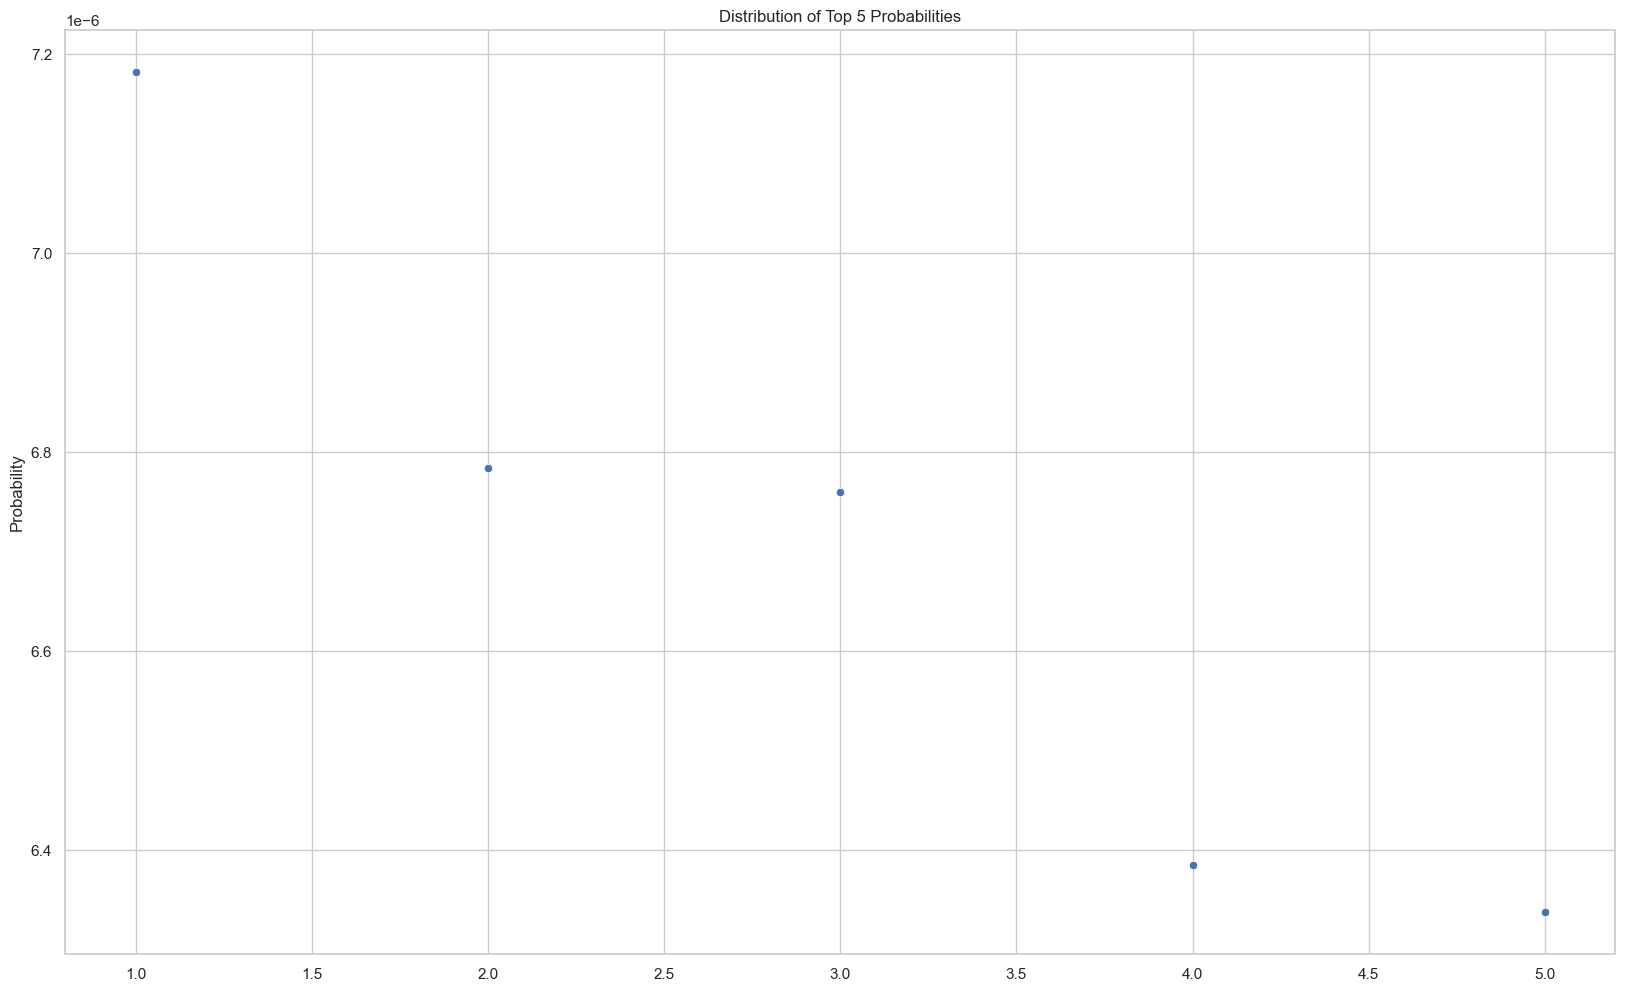

In [6]:
plt.figure(figsize=(20, 12)) 

sns.set(style="whitegrid")
# Extract probabilities from top_results
probabilities = [result for result, _ in top_results]

# Plot the probabilities using seaborn
sns.scatterplot(x=range(1, n+1), y=probabilities)
plt.title(f"Distribution of Top {n} Probabilities")
plt.ylabel("Probability")

plt.show()


Lets relate the results back to the actual bets

Note: For duplicate odds on the same match, both bets are shown

In [7]:
def bet_to_make(individual_result, df = df):    
    result, params = individual_result
    bet_df = pd.DataFrame(columns=['Game', 'Team', 'Score','Odds', 'Probability'])
    for idx, param_to_check in enumerate(params):
        matching_rows = df.loc[(df['Game'] == list(param_grid.keys())[idx]) & (df['Probability'] == param_to_check)]
        
        bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)

    return bet_df, result

placement = 1 # 1 is best result, 2 is second best result, etc.
bet_df, result = bet_to_make(individual_result=top_results[placement-1])
print(f'Probability of Win {result}')
bet_df

Probability of Win 6.783340116673448e-06


C:\Users\adamf\AppData\Local\Temp\ipykernel_2380\3756086633.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)


,Game,Team,Score,Odds,Probability
0,Burnley vs Arsenal,Arsenal,2-0,13/2,0.153846
1,Fulham vs Aston Villa,Draw,1-1,7/1,0.142857
2,Man City vs Chelsea,Man City,2-0,15/2,0.133333
3,Newcastle vs Bournemouth,Draw,1-1,8/1,0.125000
4,Nottm Forest vs West Ham,Draw,1-1,6/1,0.166667
5,Tottenham vs Wolverhampton,Draw,1-1,9/1,0.111111


In [9]:
total_probability = []

for i in range(1, 6):
    bet_df, result = bet_to_make(individual_result=top_results[i-1])
    print(f'Probability of Win {result}')
    total_probability.append(result)
    print(bet_df)
    print('\n\n')

print(f'Total Probability: {sum(total_probability)}')

Probability of Win 7.182360123536592e-06
                         Game       Team Score  Odds  Probability
0          Burnley vs Arsenal    Arsenal   2-0  13/2     0.153846
1       Fulham vs Aston Villa       Draw   1-1   7/1     0.142857
2         Man City vs Chelsea   Man City   2-0  15/2     0.133333
3    Newcastle vs Bournemouth       Draw   1-1   8/1     0.125000
4    Nottm Forest vs West Ham       Draw   1-1   6/1     0.166667
5  Tottenham vs Wolverhampton  Tottenham   2-1  17/2     0.117647



Probability of Win 6.783340116673448e-06
                         Game      Team Score  Odds  Probability
0          Burnley vs Arsenal   Arsenal   2-0  13/2     0.153846
1       Fulham vs Aston Villa      Draw   1-1   7/1     0.142857
2         Man City vs Chelsea  Man City   2-0  15/2     0.133333
3    Newcastle vs Bournemouth      Draw   1-1   8/1     0.125000
4    Nottm Forest vs West Ham      Draw   1-1   6/1     0.166667
5  Tottenham vs Wolverhampton      Draw   1-1   9/1     0.11111

C:\Users\adamf\AppData\Local\Temp\ipykernel_2380\3756086633.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)
C:\Users\adamf\AppData\Local\Temp\ipykernel_2380\3756086633.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bet_df = pd.concat([bet_df, matching_rows],ignore_index=True)
C:\Users\adamf\AppData\Local\Temp\ipykernel_2380\3756086633.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is

In [34]:
print(f'Probability of Win: {result}')

Probability of Win: 6.337376579591112e-06


Overall, the odds do not appear to be great to predict all 6 results correctly but it may be better for the 3 predictions etc

3 Correct - £5,000

4 Correct - £10,000

5 Correct - £20,000

6 Correct - £250,000